In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

uploaded = files.upload()
filename = next(iter(uploaded))


Saving us-colleges-and-universities.csv to us-colleges-and-universities.csv


In [ ]:
df = pd.read_csv(filename, delimiter=';')
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6559 entries, 0 to 6558
Data columns (total 45 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Geo Point   6559 non-null   object 
 1   Geo Shape   6559 non-null   object 
 2   OBJECTID    6559 non-null   int64  
 3   IPEDSID     6559 non-null   int64  
 4   NAME        6559 non-null   object 
 5   ADDRESS     6558 non-null   object 
 6   CITY        6559 non-null   object 
 7   STATE       6559 non-null   object 
 8   ZIP         6559 non-null   int64  
 9   ZIP4        6559 non-null   object 
 10  TELEPHONE   6559 non-null   object 
 11  TYPE        6559 non-null   int64  
 12  STATUS      6559 non-null   object 
 13  POPULATION  6559 non-null   int64  
 14  COUNTY      6559 non-null   object 
 15  COUNTYFIPS  6559 non-null   object 
 16  COUNTRY     6559 non-null   object 
 17  LATITUDE    6559 non-null   float64
 18  LONGITUDE   6559 non-null   float64
 19  NAICS_CODE  6559 non-null  

In [ ]:
print(df.isnull().sum())


Geo Point     0
Geo Shape     0
OBJECTID      0
IPEDSID       0
NAME          0
ADDRESS       1
CITY          0
STATE         0
ZIP           0
ZIP4          0
TELEPHONE     0
TYPE          0
STATUS        0
POPULATION    0
COUNTY        0
COUNTYFIPS    0
COUNTRY       0
LATITUDE      0
LONGITUDE     0
NAICS_CODE    0
NAICS_DESC    0
SOURCE        0
SOURCEDATE    0
VAL_METHOD    0
VAL_DATE      0
WEBSITE       0
STFIPS        0
COFIPS        0
SECTOR        0
LEVEL_        0
HI_OFFER      0
DEG_GRANT     0
LOCALE        0
CLOSE_DATE    0
MERGE_ID      0
ALIAS         1
SIZE_SET      0
INST_SIZE     0
PT_ENROLL     0
FT_ENROLL     0
TOT_ENROLL    0
HOUSING       0
DORM_CAP      0
TOT_EMP       0
SHELTER_ID    0
dtype: int64


In [ ]:
#Replace 'NOT AVAILABLE' and '-999' with NaN
df = df.replace(['NOT AVAILABLE', -999], pd.NA)


In [ ]:
#Make sure numeric columns are numeric :D
numeric_columns = ['OBJECTID', 'POPULATION', 'COUNTYFIPS', 'LATITUDE', 'LONGITUDE', 'STFIPS', 'COFIPS', 'SECTOR', 'LEVEL_', 'HI_OFFER', 'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID', 'SIZE_SET', 'INST_SIZE', 'PT_ENROLL', 'FT_ENROLL', 'TOT_ENROLL', 'HOUSING', 'DORM_CAP', 'TOT_EMP']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
#Convert date columns to datetime
date_columns = ['SOURCEDATE', 'VAL_DATE']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')


In [ ]:
#column for the institution type based on the 'TYPE' column
df['INSTITUTION_TYPE'] = df['TYPE'].map({1: 'Public', 2: 'Private Non-Profit', 3: 'Private For-Profit'})


In [ ]:
#column for the institution status based on the 'STATUS' column
df['INSTITUTION_STATUS'] = df['STATUS'].map({'A': 'Active', 'C': 'Closed', 'G': 'Graduate Only'})


In [ ]:
print(df.describe())


         OBJECTID        IPEDSID           ZIP         TYPE     POPULATION  \
count  6559.00000    6559.000000   6559.000000  6559.000000    6292.000000   
mean   3280.00000  290230.601006  49006.583473     2.010215    3686.019072   
std    1893.56454  140513.800011  30226.485810     1.007771    8903.688383   
min       1.00000  100654.000000    602.000000    -3.000000       2.000000   
25%    1640.50000  171349.500000  23032.500000     1.000000     134.000000   
50%    3280.00000  223852.000000  46202.000000     2.000000     595.000000   
75%    4919.50000  449078.500000  77024.500000     3.000000    3144.250000   
max    6559.00000  496423.000000  99801.000000     3.000000  154991.000000   

         COUNTYFIPS     LATITUDE    LONGITUDE     NAICS_CODE       STFIPS  \
count   6556.000000  6559.000000  6559.000000    6559.000000  6556.000000   
mean   29240.830842    37.209344   -90.511778  611363.538802    29.155735   
std    17020.894566     5.949359    18.113995     127.592843    16

In [ ]:
#Top 10 states by number of institutions
top_10_states = df['STATE'].value_counts().head(10)
print("\nTop 10 states by number of institutions:")
print(top_10_states)


Top 10 states by number of institutions:
STATE
CA    718
NY    450
TX    432
FL    363
PA    343
OH    286
IL    257
MI    172
NC    169
NJ    168
Name: count, dtype: int64


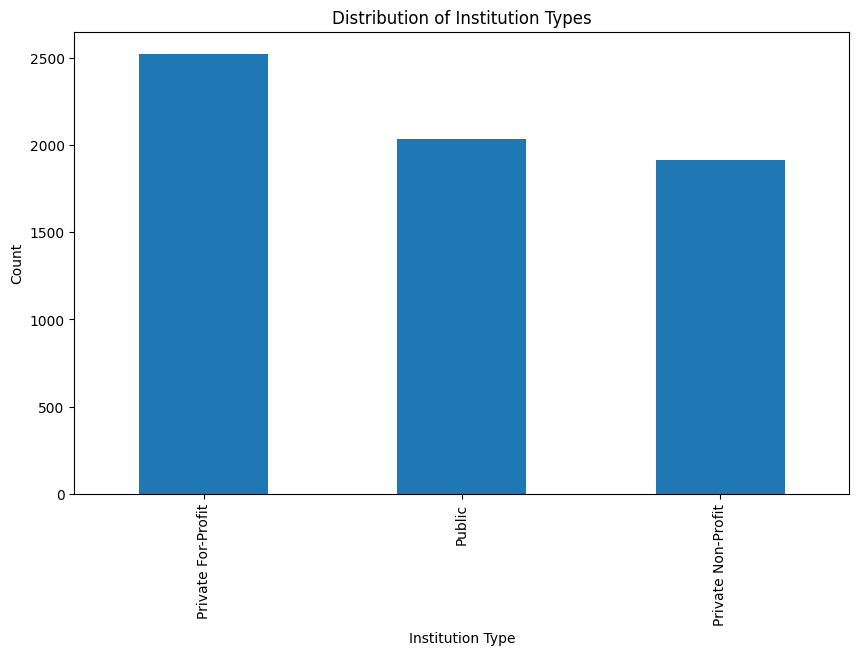

In [ ]:
# Visualize the distribution of institution types
plt.figure(figsize=(10, 6))
df['INSTITUTION_TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Institution Types')
plt.xlabel('Institution Type')
plt.ylabel('Count')
plt.show()

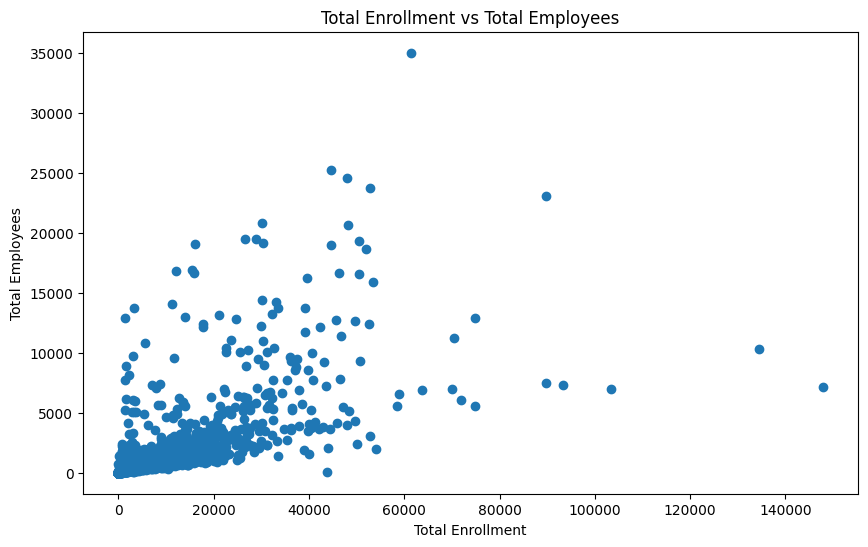

In [ ]:
#Visualize relationship between total enrollment and total employees
plt.figure(figsize=(10, 6))
plt.scatter(df['TOT_ENROLL'], df['TOT_EMP'])
plt.title('Total Enrollment vs Total Employees')
plt.xlabel('Total Enrollment')
plt.ylabel('Total Employees')
plt.show()

In [ ]:
#save data
df.to_csv('preprocessed_us_colleges.csv', index=False)
print("\nPreprocessing complete. Data saved to 'preprocessed_us_colleges.csv'")


Preprocessing complete. Data saved to 'preprocessed_us_colleges.csv'


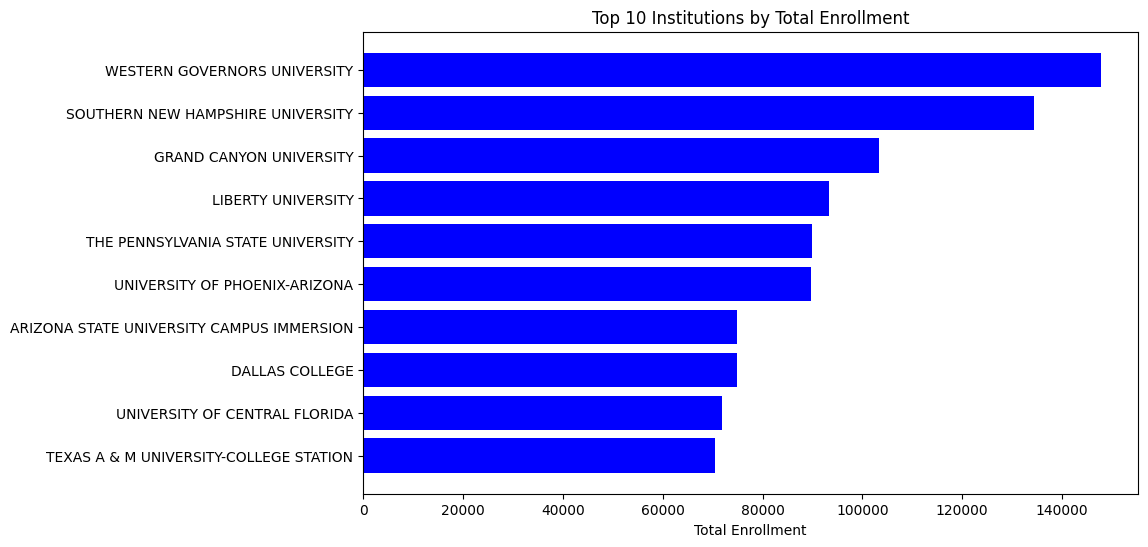

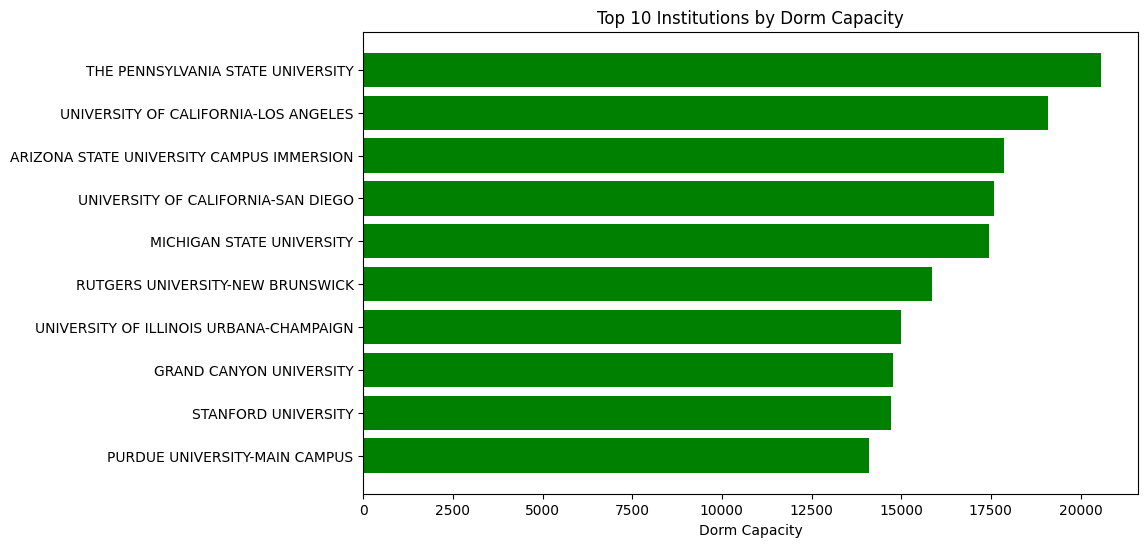

In [ ]:
# Convert numeric columns to appropriate data types
df['TOT_ENROLL'] = pd.to_numeric(df['TOT_ENROLL'], errors='coerce')
df['DORM_CAP'] = pd.to_numeric(df['DORM_CAP'], errors='coerce')

# Identify the top 10 institutions by total enrollment
top_10_enrollment = df.nlargest(10, 'TOT_ENROLL')[['NAME', 'TOT_ENROLL']]

# Identify the top 10 institutions by dorm capacity
top_10_dorm_capacity = df.nlargest(10, 'DORM_CAP')[['NAME', 'DORM_CAP']]

# Plot top 10 institutions by total enrollment
plt.figure(figsize=(10, 6))
plt.barh(top_10_enrollment['NAME'], top_10_enrollment['TOT_ENROLL'], color='blue')
plt.xlabel('Total Enrollment')
plt.title('Top 10 Institutions by Total Enrollment')
plt.gca().invert_yaxis()  # Invert y-axis to display the largest on top
plt.show()

# Plot top 10 institutions by dorm capacity
plt.figure(figsize=(10, 6))
plt.barh(top_10_dorm_capacity['NAME'], top_10_dorm_capacity['DORM_CAP'], color='green')
plt.xlabel('Dorm Capacity')
plt.title('Top 10 Institutions by Dorm Capacity')
plt.gca().invert_yaxis()  # Invert y-axis to display the largest on top
plt.show()

In [ ]:
import folium

# Convert latitude and longitude columns to numeric types
df['LATITUDE'] = pd.to_numeric(df['LATITUDE'], errors='coerce')
df['LONGITUDE'] = pd.to_numeric(df['LONGITUDE'], errors='coerce')

# Drop rows with missing latitude or longitude
df = df.dropna(subset=['LATITUDE', 'LONGITUDE'])

# Create a folium map centered around the geographical center of the U.S.
us_map = folium.Map(location=[37.0902, -95.7129], zoom_start=5)

# Add markers for each institution on the map
for index, row in df.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=row['NAME'],
    ).add_to(us_map)

# Save the map to an HTML file or display it directly in a notebook
us_map.save("us_colleges_map.html")
us_map


<Figure size 1000x600 with 0 Axes>

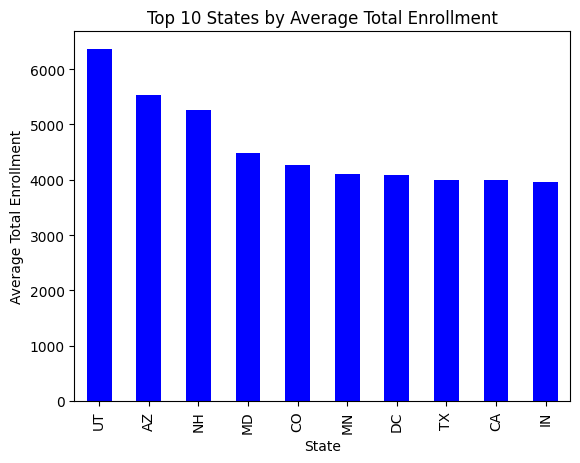

In [ ]:
# Group the data by state and calculate the average values
statewise_stats = df.groupby('STATE').agg(
    avg_total_enrollment=('TOT_ENROLL', 'mean'),
    avg_dorm_capacity=('DORM_CAP', 'mean'),
    institution_count=('STATE', 'count')
).reset_index()

# Drop rows with missing values in the comparison metrics
statewise_stats = statewise_stats.dropna(subset=['avg_total_enrollment', 'avg_dorm_capacity'])

# Plot state-wise average total enrollment
plt.figure(figsize=(10, 6))
statewise_stats.sort_values(by='avg_total_enrollment', ascending=False).head(10).plot(
    x='STATE', y='avg_total_enrollment', kind='bar', color='blue', legend=False)
plt.title('Top 10 States by Average Total Enrollment')
plt.ylabel('Average Total Enrollment')
plt.xlabel('State')
plt.show()


<Figure size 1000x600 with 0 Axes>

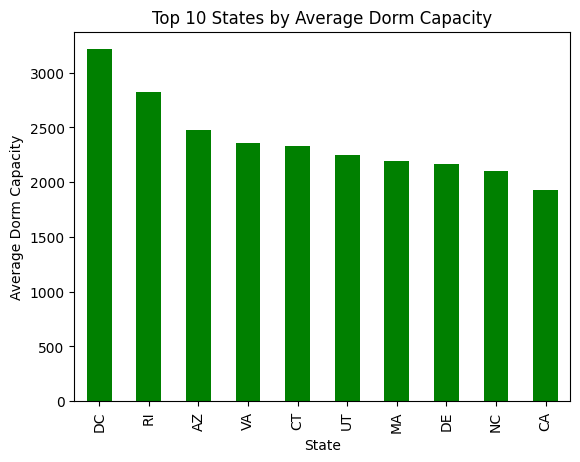

In [ ]:
# Plot state-wise average dorm capacity
plt.figure(figsize=(10, 6))
statewise_stats.sort_values(by='avg_dorm_capacity', ascending=False).head(10).plot(
    x='STATE', y='avg_dorm_capacity', kind='bar', color='green', legend=False)
plt.title('Top 10 States by Average Dorm Capacity')
plt.ylabel('Average Dorm Capacity')
plt.xlabel('State')
plt.show()


<Figure size 1000x600 with 0 Axes>

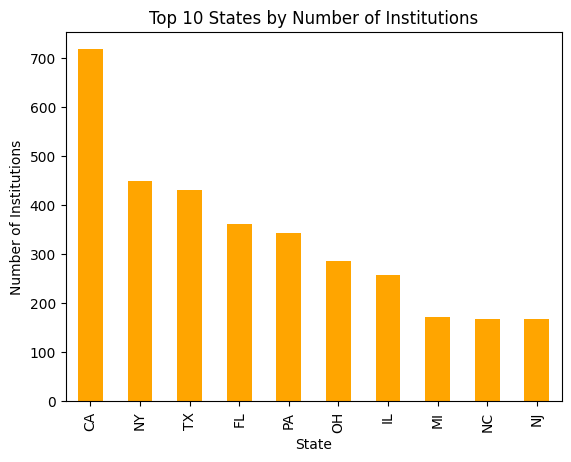

In [ ]:
# Plot the number of institutions in each state
plt.figure(figsize=(10, 6))
statewise_stats.sort_values(by='institution_count', ascending=False).head(10).plot(
    x='STATE', y='institution_count', kind='bar', color='orange', legend=False)
plt.title('Top 10 States by Number of Institutions')
plt.ylabel('Number of Institutions')
plt.xlabel('State')
plt.show()